# Notebook #02: Subtraction Analyses

In [1]:
# Define helper function for dual threshold based on voxel-p and cluster size (in mm3)
def dual_thresholding(
    stat_img, voxel_thresh, cluster_size, two_sided=True, fname_out=None
):

    from nilearn import glm, image
    import numpy as np

    # If img_z is a file path, we first need to read the image
    img_z = image.load_img(img=img_z)

    # Check if the image is empty
    if np.all(img_z.get_fdata() == 0):
        print("THE IMAGE IS EMPTY! RETURNING THE ORIGINAL IMAGE.")
        return img_z

    # Convert desired cluster size to number of voxels
    k = cluster_size // 8

    # Actual thresholding
    img_z_thresh, thresh_z = glm.threshold_stats_img(
        stat_img=stat_img,
        alpha=voxel_thresh,
        height_control="fpr",
        cluster_threshold=k,
        two_sided=two_sided,
    )

    # Print which thresholds were used
    print(
        "THRESHOLDED IMAGE AT Z > "
        + str(thresh_z)
        + " (P = "
        + str(voxel_thresh)
        + ") AND K > "
        + str(k)
        + " ("
        + str(cluster_size)
        + " mm3)"
    )

    # If requested, save the thresholded map
    if fname_out:

        from nibabel import save

        save(img_z_thresh, filename=fname_out)

    return img_z_thresh

SUBTRACTION ANALYSIS FOR "../results/ale/knowledge.txt" MINUS "../results/ale/nknowledge.txt" WITH 50000 PERMUTATIONS
(thresholding subtraction map at z > 2.575829303548901 and k > 25)
SUBTRACTION ANALYSIS FOR "../results/ale/knowledge.txt" MINUS "../results/ale/nknowledge.txt" WITH 50000 PERMUTATIONS
(thresholding subtraction map at z > 2.575829303548901 and k > 25)
SUBTRACTION ANALYSIS FOR "../results/ale/lexical.txt" MINUS "../results/ale/nlexical.txt" WITH 50000 PERMUTATIONS
(thresholding subtraction map at z > 2.575829303548901 and k > 25)
SUBTRACTION ANALYSIS FOR "../results/ale/lexical.txt" MINUS "../results/ale/nlexical.txt" WITH 50000 PERMUTATIONS
(thresholding subtraction map at z > 2.575829303548901 and k > 25)
SUBTRACTION ANALYSIS FOR "../results/ale/objects.txt" MINUS "../results/ale/nobjects.txt" WITH 50000 PERMUTATIONS
(thresholding subtraction map at z > 2.575829303548901 and k > 25)
SUBTRACTION ANALYSIS FOR "../results/ale/objects.txt" MINUS "../results/ale/nobjects.tx

Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
1,-30,10,-12,4.11,1728
2,-38,18,38,4.11,1384
3,40,-36,16,3.94,1192
4,2,-26,6,3.57,2512
5,60,-46,42,3.37,696
6,40,-24,0,3.13,536
7,2,14,48,3.01,208
8,40,30,28,3.00,784


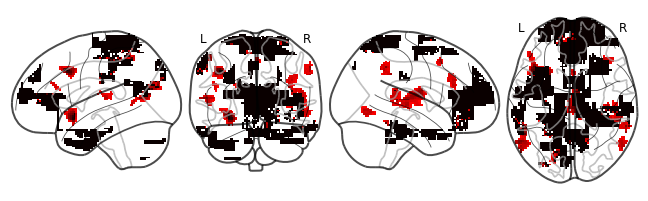

In [1]:
# Define function for performing a single ALE subtraction analysis
def run_subtraction(
    text_file1, text_file2, voxel_thresh, cluster_size, n_iters, output_dir
):

    from nimare import io, meta
    from os import path, makedirs
    from nibabel import save

    # Print the current analysis
    print(
        'SUBTRACTION ANALYSIS FOR "'
        + text_file1
        + '" VS. "'
        + text_file2
        + '" WITH '
        + str(n_iters)
        + " PERMUTATIONS"
    )

    # Read Sleuth files
    dset1 = io.convert_sleuth_to_dataset(text_file=text_file1)
    dset2 = io.convert_sleuth_to_dataset(text_file=text_file2)

    # # Set a random seed to make the results reproducible
    # from numpy import random
    # random.seed(1234)

    # Actually perform subtraction analysis
    sub = meta.cbma.ALESubtraction(n_iters=n_iters, low_memory=False)
    sres = sub.fit(dset1, dset2)

    # Save the unthresholded z-map
    img_z = sres.get_map("z_desc-group1MinusGroup2")
    makedirs(output_dir, exist_ok=True)
    name1 = path.basename(text_file1).replace(".txt", "")
    name2 = path.basename(text_file2).replace(".txt", "")
    prefix = output_dir + "/" + name1 + "_minus_" + name2
    save(img_z, filename=prefix + "_z.nii.gz")

    # Create and save thresholded z-map
    dual_thresholding(
        stat_img=img_z,
        voxel_thresh=voxel_thresh,
        cluster_size=cluster_size,
        two_sided=True,
        fname_out=prefix + "_z_thresh.nii.gz",
    )


if __name__ == "__main__":

    # Create dictionary for which subtraction analyses to run
    subtrs = dict(
        {
            "../results/ale/knowledge.txt": "../results/ale/nknowledge.txt",
            # "../results/ale/lexical.txt": "../results/ale/nlexical.txt",
            # "../results/ale/objects.txt": "../results/ale/nobjects.txt",
            # "../results/ale/older.txt": "../results/ale/younger.txt",
        }
    )

    # Use our function to perform the actual subtraction analyses
    for key, value in zip(subtrs.keys(), subtrs.values()):
        run_subtraction(
            text_file1=key,
            text_file2=value,
            voxel_thresh=0.01,
            cluster_size=200,
            n_iters=10,
            output_dir="../results/subtraction",
        )
        run_subtraction(
            text_file1=key,
            text_file2=value,
            voxel_thresh=0.01,
            cluster_size=200,
            n_iters=10,
            output_dir="../results/subtraction2",
        )

Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
1,-40,16,36,3.85,1328
2,-30,10,-12,3.78,1456
3,40,-36,16,3.67,1216
4,2,-26,6,3.51,2504
5,60,-46,42,3.37,744
6,40,-24,0,3.14,560
7,36,28,22,2.94,712


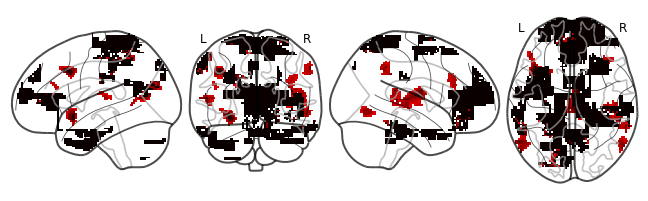

In [3]:
if __name__ == "__main__":

    from nilearn import image, plotting, reporting

    # Glass brain example
    img = image.load_img(
        "../results/subtraction/knowledge_minus_nknowledge_z_tresh.nii.gz"
    )
    p = plotting.plot_glass_brain(img, display_mode="lyrz", vmax=4, colorbar=True)

    # Cluster table example
    t = reporting.get_clusters_table(img, stat_threshold=0, min_distance=1000)
    t.style.format(
        {"X": "{:.0f}", "Y": "{:.0f}", "Z": "{:.0f}", "Peak Stat": "{:.2f}"}
    ).hide_index()
    print(t)

In [ ]:
if __name__ == "__main__":

    # Glass brain example
    img = image.load_img(
        "../results/subtraction2/knowledge_minus_nknowledge_z_tresh.nii.gz"
    )
    p1 = plotting.plot_glass_brain(img, display_mode="lyrz", vmax=4, colorbar=True)

    # Cluster table example
    t = reporting.get_clusters_table(posimg, stat_threshold=0, min_distance=1000)
    t.style.format(
        {"X": "{:.0f}", "Y": "{:.0f}", "Z": "{:.0f}", "Peak Stat": "{:.2f}"}
    ).hide_index()
    print(t)